In [1]:
import re
import numpy as np

def remove_docstrings(code):
    # 使用正则表达式匹配被 """ 包括的部分，并替换为空字符串
    cleaned_code = re.sub(r'""".*?"""', '', code, flags=re.DOTALL)
    cleaned_code = re.sub(r"'''.*?'''", '', cleaned_code, flags=re.DOTALL)
    return cleaned_code

def cosine_similarity_matrix(nl_features, code_features):
    # 计算每个特征向量的范数
    nl_norms = np.linalg.norm(nl_features, axis=1, keepdims=True)
    code_norms = np.linalg.norm(code_features, axis=1, keepdims=True)
    
    # 计算点积
    dot_product = np.dot(nl_features, code_features.T)
    
    # 计算余弦相似度矩阵
    cosine_similarity = dot_product / (nl_norms * code_norms.T)
    
    return cosine_similarity

In [2]:
def remove_padding_intervals(tokenized_id_data):
    """
    移除 tokenized_id_data 中所有 `[0,0]` 区间（除非它是开头的第一个区间）。

    Args:
    - tokenized_id_data (list of lists): 包含区间的列表，每个区间是一个长度为 2 的列表。

    Returns:
    - filtered_data (list of lists): 移除 `[0,0]` 填充数据后的区间列表。
    """
    if isinstance(tokenized_id_data, np.ndarray):
        tokenized_id_data = tokenized_id_data.tolist()  # 将 NumPy 数组转换为列表
    # 处理的结果列表
    filtered_data = []

    # 保留开头的 `[0,0]` 区间（如果存在）
    if tokenized_id_data and tokenized_id_data[0] == [0,0]:
        filtered_data.append([0,0])
        start_index = 1  # 从第二个元素开始检查
    else:
        start_index = 0

    # 处理剩余的区间
    for interval in tokenized_id_data[start_index:]:
        if interval != [0,0]:  # 仅添加非 `[0,0]` 区间
            filtered_data.append(interval)

    return filtered_data

In [3]:
import json
def load_loss_data(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return np.array(data)

In [4]:
with open("/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/dataset/python/train.jsonl", "r") as f:
    train_dataset = [json.loads(line) for line in f.readlines()]


In [5]:
import json
import os

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/tokenized_code_tokens_train.json'

# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    code_tokens_data = json.load(f)

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/tokenized_comment_tokens_train.json'


# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    nl_tokens_data = json.load(f)

In [177]:
retri_code_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_code_cls_token_retri.npy'
retri_nl_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_nl_cls_token_retri.npy'

retri_nl_cls_tokens = np.load(retri_nl_cls_tokens_path)
retri_code_cls_tokens = np.load(retri_code_cls_tokens_path)

In [6]:
import json
input_path = "/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/sorted_label_human_auto.jsonl"
idx_list = []
match_list = []

with open(input_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip().rstrip(',')  # 去除行末的逗号
        json_obj = json.loads(line)
        idx_list.append(json_obj['idx'])
        match_list.append(json_obj['match'])

In [203]:
import numpy as np

# 文件路径
nl_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_nl_tokens_retri.npy'
code_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_code_tokens_retri.npy'

# 读取nl_tokens.npy
all_nl_tokens = np.load(nl_tokens_path)

# 读取code_tokens.npy
all_code_tokens = np.load(code_tokens_path)

In [172]:
code_ind = comment_id = comment_ind = 1440
# code_ind = 8222

In [173]:
code_data = code_tokens_data[code_ind]
comment_data = nl_tokens_data[comment_ind]

In [174]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/code_labels/'

# 遍历列表的每一项
for i, token_list in enumerate(code_data):
   
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        code_length = i
        break

print("处理完成！")

处理完成！


In [175]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/comment_labels/'

# 遍历列表的每一项
for i, token_list in enumerate(comment_data):
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        comment_length = i
        break

print("处理完成！")

处理完成！


In [204]:
from sklearn.metrics.pairwise import cosine_similarity
comment_sim = cosine_similarity(all_nl_tokens[comment_ind][0].reshape(1, -1), retri_nl_cls_tokens[comment_id].reshape(1, -1))
code_sim = cosine_similarity(all_code_tokens[code_ind][0].reshape(1, -1), retri_code_cls_tokens[code_ind].reshape(1, -1))
print(comment_sim, code_sim)

[[-0.01277535]] [[-0.04049438]]


In [201]:
output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/train_data.npy'

# 获取 n 和 m
n = comment_length
m = code_length

# 读取nl_tokens.npy中的前n条数据
nl_tokens = all_nl_tokens[comment_ind][:n]

# 读取code_tokens.npy中的前m条数据
code_tokens = all_code_tokens[code_ind][:m]

nl_tokens[0] = retri_nl_cls_tokens[comment_id]
code_tokens[0] = retri_code_cls_tokens[code_ind]

# 拼接两部分数据
combined_data = np.concatenate((nl_tokens, code_tokens))
print(combined_data.shape)

# 将拼接后的数据保存到train_data.npy
np.save(output_path, combined_data)

# print(f"拼接完成！数据已保存到 {output_path}")


[[0.9999999]] [[0.99999994]]
(263, 768)


In [179]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

import umap


# 读取高维向量 (num, 768)
input_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/train_data.npy'
data = np.load(input_path)

# 使用UMAP进行降维到二维
umap_model = umap.UMAP(n_components=2)
embedding = umap_model.fit_transform(data)

# 将降维后的结果保存到embedding.npy文件中
output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/embedding.npy'
np.save(output_path, embedding)

# print(f"Embedding saved to {output_path}")


In [180]:
all_nodes_2d = embedding  # 使用你降维后的二维数据

x_min, y_min = np.min(all_nodes_2d, axis=0)
x_max, y_max = np.max(all_nodes_2d, axis=0)
# ebd_extent = ebd_max - ebd_min
x_extent = x_max - x_min
y_extent = y_max - y_min

x_min = x_min - 0.3 * x_extent
x_max = x_max + 0.3 * x_extent
y_min = y_min - 0.3 * y_extent
y_max = y_max + 0.3 * y_extent

# x_min = min(x_min, y_min)
# y_min = min(x_min, y_min)
# x_max = max(x_max, y_max)
# y_max = max(x_max, y_max)


# 打印结果
print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")

# 将结果保存到指定文件夹
save_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2'
scale_path = os.path.join(save_dir, "scale.npy")
np.save(scale_path, [x_min, y_min, x_max, y_max])

# print(f"Scale saved to {scale_path}")

x_min: -15.34377841949463, x_max: 16.821346092224122, y_min: 2.4827696800231935, y_max: 17.424223232269288


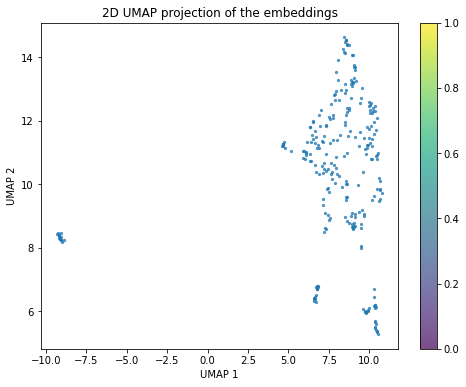

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/embedding.npy


In [181]:
import matplotlib.pyplot as plt

# 可视化 embedding 的二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral', alpha=0.7)
plt.title('2D UMAP projection of the embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

print(f"Embedding saved to {output_path}")

In [182]:
import numpy as np
import json
import os
from sklearn.metrics.pairwise import cosine_similarity

# 读取数据
data_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/train_data.npy'
data = np.load(data_path)

# 读取 comment token 长度
comment_index_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/comment_index.json'
with open(comment_index_path, 'r') as f:
    comment_length = len(json.load(f))

# 拆分 data 成 comment 和 code token
comments = data[:comment_length]
code_tokens = data[comment_length:]

# 计算相似度函数（使用余弦相似度）
def compute_similarity(tokens_a, tokens_b):
    return cosine_similarity(tokens_a, tokens_b)

# intra 相似度计算
intra_comment_sim = compute_similarity(comments, comments)
intra_code_sim = compute_similarity(code_tokens, code_tokens)

# inter 相似度计算
inter_comment_code_sim = compute_similarity(comments, code_tokens)
inter_code_comment_sim = compute_similarity(code_tokens, comments)

# 获取前 k 个最近邻
k = 5  # 假设我们需要前 5 个最近邻
def get_top_k_indices(sim_matrix, k):
    return np.argsort(-sim_matrix, axis=1)[:, :k]  # 获取前 k 个索引

# intra 计算
intra_comment_neighbors = get_top_k_indices(intra_comment_sim, k)
intra_code_neighbors = get_top_k_indices(intra_code_sim, k) + comment_length  # 加 offset

# inter 计算
inter_comment_neighbors = get_top_k_indices(inter_comment_code_sim, k) + comment_length  # comment 对 code 的相似度
inter_code_neighbors = get_top_k_indices(inter_code_comment_sim, k)  # code 对 comment 的相似度

# 拼接 intra 和 inter 结果
intra_neighbors = np.concatenate([intra_comment_neighbors, intra_code_neighbors], axis=0)
inter_neighbors = np.concatenate([inter_comment_neighbors, inter_code_neighbors], axis=0)


In [183]:

# 保存结果到文件
save_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2'
intra_path = os.path.join(save_dir, "intra_similarity.npy")
inter_path = os.path.join(save_dir, "inter_similarity.npy")

np.save(intra_path, intra_neighbors)
np.save(inter_path, inter_neighbors)

# print(f"Intra neighbors saved to {intra_path}")
# print(f"Inter neighbors saved to {inter_path}")


In [184]:
ori_valid_code_attention_output_path = os.path.join("/home/yiming/cophi/training_dynamic/features/retri", 'train_code_attention_retri.npy')
ori_valid_nl_attention_output_path = os.path.join("/home/yiming/cophi/training_dynamic/features/retri", 'train_nl_attention_retri.npy')
ori_valid_code_attention_feature = np.load(ori_valid_code_attention_output_path)
ori_valid_nl_attention_feature = np.load(ori_valid_nl_attention_output_path)

In [185]:
# 预设10种高对比度颜色
high_contrast_colors = [
    "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
    "#00FFFF", "#800000", "#008000", "#000080", "#808000"
]

In [186]:
indices = [i for i, value in enumerate(idx_list) if value == comment_id]

# 提取match_list中对应索引的值
match_values = [match_list[i] for i in indices]

# 输出结果
print("Indices of 7045 in idx_list:", indices)
print("Corresponding values in match_list:", match_values)
# 初始化结果列表
comment_list = []
code_list = []

# 遍历 match_values，处理每个 comment 和 code 的区间
for match in match_values[0]:  # 假设 match_values 的结构是 [[...]]
    comment_intervals, code_intervals = match

    # 展开 comment 的所有索引
    comment_indices = []
    for start, end in zip(comment_intervals[::2], comment_intervals[1::2]):
        comment_indices.extend(range(start, end + 1))
    comment_list.append(comment_indices)

    # 展开 code 的所有索引
    code_indices = []
    for start, end in zip(code_intervals[::2], code_intervals[1::2]):
        code_indices.extend(range(start, end + 1))
    code_list.append(code_indices)

# 输出结果
print("Comment indices list:", comment_list)
print("Code indices list:", code_list)


Indices of 7045 in idx_list: [82]
Corresponding values in match_list: [[[[0, 1], [123, 123]], [[3, 3], [3, 4]], [[6, 6], [123, 123]], [[10, 10], [9, 10, 13, 13]]]]
Comment indices list: [[0, 1], [3], [6], [10]]
Code indices list: [[123], [3, 4], [123], [9, 10, 13]]


In [187]:
import numpy as np
from collections import deque
from IPython.display import display, HTML

array = ori_valid_nl_attention_feature[comment_id]
array = array[1:]

token_list1 = nl_tokens_data[comment_id][1:]
doc_snippet = train_dataset[comment_id]["docstring"]
normalized_contributions = (array - array.min()) / (array.max() - array.min())

# 将 token 与对应的贡献值配对，并去掉 token 中的 "Ġ" 符号
tokens_with_contributions = deque([(token.replace("Ġ", ""), contrib) for token, contrib in zip(token_list1, normalized_contributions)])

# 为每个 comment_list 的索引组指定颜色
color_map = {}
for i, indices in enumerate(comment_list):
    color = high_contrast_colors[i % len(high_contrast_colors)]  # 循环使用颜色
    for idx in indices:
        color_map[idx] = color

# 生成HTML带字体大小和颜色调整的输出
html_string = "<pre>"
buffer = ""
current_index = 0  # 追踪 code_snippet 中字符的索引位置

# 遍历原始代码片段的每个字符
for char in doc_snippet:
    if char == "\n":
        # 遇到换行符则添加 <br> 标签并清空缓冲区
        html_string += buffer + "<br>"
        buffer = ""
    elif tokens_with_contributions:
        # 获取当前 token 和其贡献值
        token, contrib = tokens_with_contributions[0]
        buffer += char

        # 逐字符匹配：检查 token 是否与 buffer 逐字符匹配
        if buffer == token:
            # 将贡献值映射到字体大小范围 [8, 16]
            font_size = 8 + (16 - 8) * contrib
            color = color_map.get(current_index, "black")  # 如果索引有颜色则应用，否则默认为黑色
            html_string += f'<span style="font-size: {font_size}px; color: {color};">{buffer}</span>'
            buffer = ""  # 清空缓冲区
            tokens_with_contributions.popleft()  # 移除已匹配的 token
            current_index += 1
        elif not token.startswith(buffer):
            # 如果缓冲区字符序列和当前 token 不匹配，将缓冲区第一个字符添加到 HTML 并继续逐字符匹配
            color = color_map.get(current_index, "black")
            html_string += f'<span style="color: {color};">{buffer[0]}</span>'
            buffer = buffer[1:]      
        
    else:
        # 如果没有更多 token 需要匹配，默认输出字符
        color = color_map.get(current_index, "black")
        html_string += f'<span style="color: {color};">{char}</span>'

html_string += buffer  # 添加剩余的缓冲区内容
html_string += "</pre>"

# 在Jupyter Notebook中显示带有字体大小和颜色调整的文本
display(HTML(html_string))

In [194]:
# 假设我们有原始代码片段和分词后的 tokens（包含缩进和换行）
code_snippet = remove_docstrings(train_dataset[code_ind]["code"])
token_list2 = code_tokens_data[code_ind][1:]

# 假设注意力特征数组 (示例)
code_attention_feature = ori_valid_code_attention_feature[code_ind][1:]  # 模拟的注意力分数

# 归一化注意力特征
code_normalized_contributions = (code_attention_feature - code_attention_feature.min()) / (code_attention_feature.max() - code_attention_feature.min())

# 将 token 与对应的贡献值配对，并去掉 token 中的 "Ġ" 符号
tokens_with_contributions = deque([(token.replace("Ġ", ""), contrib) for token, contrib in zip(token_list2, code_normalized_contributions)])

# 为每个 code_list 的索引组指定颜色
color_map = {}
for i, indices in enumerate(code_list):
    color = high_contrast_colors[i % len(high_contrast_colors)]  # 循环使用颜色
    for idx in indices:
        color_map[idx] = color

# 生成HTML带字体大小和颜色调整的输出
html_string = "<pre>"
buffer = ""
current_index = 0  # 追踪 code_snippet 中字符的索引位置

# 遍历原始代码片段的每个字符
for char in code_snippet:
    if char == "\n":
        # 遇到换行符则添加 <br> 标签并清空缓冲区
        html_string += buffer + "<br>"
        buffer = ""
    elif tokens_with_contributions:
        # 获取当前 token 和其贡献值
        token, contrib = tokens_with_contributions[0]
        buffer += char

        # 逐字符匹配：检查 token 是否与 buffer 逐字符匹配
        if buffer == token:
            # 将贡献值映射到字体大小范围 [8, 16]
            font_size = 8 + (16 - 8) * contrib
            color = color_map.get(current_index, "black")  # 如果索引有颜色则应用，否则默认为黑色
            html_string += f'<span style="font-size: {font_size}px; color: {color};">{buffer}</span>'
            buffer = ""  # 清空缓冲区
            tokens_with_contributions.popleft()  # 移除已匹配的 token
            current_index += 1
        elif not token.startswith(buffer):
            # 如果缓冲区字符序列和当前 token 不匹配，将缓冲区第一个字符添加到 HTML 并继续逐字符匹配
            color = color_map.get(current_index, "black")
            html_string += f'<span style="color: {color};">{buffer[0]}</span>'
            buffer = buffer[1:]      
        
    else:
        # 如果没有更多 token 需要匹配，默认输出字符
        color = color_map.get(current_index, "black")
        html_string += f'<span style="color: {color};">{char}</span>'

html_string += buffer  # 添加剩余的缓冲区内容
html_string += "</pre>"

# 在Jupyter Notebook中显示带有字体大小和颜色调整的文本
display(HTML(html_string))

In [195]:
comment_sorted_indices = np.argsort(-intra_comment_sim)
# 遍历每一行的排序索引，并输出排序后的 comment_data
for row_idx, sorted_indices in enumerate(comment_sorted_indices):
    sorted_comments = [comment_data[i] for i in sorted_indices]
    sorted_similarities = [intra_comment_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {comment_data[row_idx]} most similar comments:")
    for idx, (comment, similarity) in enumerate(zip(sorted_comments, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar comments:
  Rank 1: <s> (Similarity: 1.0000)
  Rank 2: Ġdesired (Similarity: 0.0040)
  Rank 3: Ext (Similarity: -0.0019)
  Rank 4: Ġ. (Similarity: -0.0081)
  Rank 5: ract (Similarity: -0.0106)
  Rank 6: Ġa (Similarity: -0.0151)
  Rank 7: Ġgeometry (Similarity: -0.0178)
  Rank 8: Ġmatching (Similarity: -0.0206)
  Rank 9: Ġof (Similarity: -0.0212)
  Rank 10: Ġatom (Similarity: -0.0222)
  Rank 11: Ġa (Similarity: -0.0246)
  Rank 12: Ġsubset (Similarity: -0.0306)
  Rank 13: Ġa (Similarity: -0.0314)

Row Ext most similar comments:
  Rank 1: Ext (Similarity: 1.0000)
  Rank 2: ract (Similarity: 0.9877)
  Rank 3: Ġa (Similarity: 0.9410)
  Rank 4: Ġ. (Similarity: 0.9396)
  Rank 5: Ġof (Similarity: 0.9337)
  Rank 6: Ġsubset (Similarity: 0.9213)
  Rank 7: Ġa (Similarity: 0.9199)
  Rank 8: Ġa (Similarity: 0.9147)
  Rank 9: Ġgeometry (Similarity: 0.9081)
  Rank 10: Ġmatching (Similarity: 0.9027)
  Rank 11: Ġatom (Similarity: 0.8980)
  Rank 12: Ġdesired (Similarity: 0.8710)
  Ra

In [196]:
code_sorted_indices = np.argsort(-intra_code_sim)
# 遍历每一行的排序索引，并输出排序后的 code_data
for row_idx, sorted_indices in enumerate(code_sorted_indices):
    sorted_code = [code_data[i] for i in sorted_indices]
    sorted_similarities = [intra_code_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {code_data[row_idx]} most similar codes:")
    for idx, (comment, similarity) in enumerate(zip(sorted_code, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar codes:
  Rank 1: <s> (Similarity: 1.0000)
  Rank 2: Ġn (Similarity: 0.0044)
  Rank 3: nd (Similarity: 0.0024)
  Rank 4: Ġnp (Similarity: -0.0000)
  Rank 5: nd (Similarity: -0.0007)
  Rank 6: umpy (Similarity: -0.0011)
  Rank 7: Ġn (Similarity: -0.0024)
  Rank 8: Ġsplit (Similarity: -0.0035)
  Rank 9: vec (Similarity: -0.0039)
  Rank 10: Ġn (Similarity: -0.0050)
  Rank 11: Ġimport (Similarity: -0.0070)
  Rank 12: len (Similarity: -0.0082)
  Rank 13: vec (Similarity: -0.0102)
  Rank 14: Ġlen (Similarity: -0.0105)
  Rank 15: Ġnp (Similarity: -0.0109)
  Rank 16: Dim (Similarity: -0.0121)
  Rank 17: Ġshape (Similarity: -0.0123)
  Rank 18: Ġnorm (Similarity: -0.0142)
  Rank 19: Ġshape (Similarity: -0.0149)
  Rank 20: len (Similarity: -0.0161)
  Rank 21: Ġg (Similarity: -0.0164)
  Rank 22: ĠSY (Similarity: -0.0166)
  Rank 23: Ġmake (Similarity: -0.0167)
  Rank 24: Ġmake (Similarity: -0.0179)
  Rank 25: Ġas (Similarity: -0.0193)
  Rank 26: Ġnp (Similarity: -0.0195)
  Rank 

In [197]:
inter_comment_code_sim.shape

(13, 250)

In [198]:
print(np.max(inter_comment_code_sim))  # 输出最大值
print(np.min(inter_comment_code_sim))  # 输出最小值
print(np.max(intra_comment_sim))
print(np.min(intra_comment_sim))
print(np.max(intra_code_sim))
print(np.min(intra_code_sim))

0.65859234
-0.041508976
1.0000002
-0.031360038
1.0000005
-0.07566163


In [199]:
comment_sorted_indices = np.argsort(-inter_comment_code_sim)
# 遍历每一行的排序索引，并输出排序后的 comment_data
for row_idx, sorted_indices in enumerate(comment_sorted_indices):
    sorted_comments = [code_data[i] for i in sorted_indices]
    sorted_similarities = [inter_comment_code_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {comment_data[row_idx]} most similar codes:")
    for idx, (comment, similarity) in enumerate(zip(sorted_comments, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar codes:
  Rank 1: <s> (Similarity: 0.5716)
  Rank 2: umpy (Similarity: 0.0301)
  Rank 3: d (Similarity: 0.0299)
  Rank 4: Dim (Similarity: 0.0291)
  Rank 5: Ġn (Similarity: 0.0260)
  Rank 6: Ġsplit (Similarity: 0.0234)
  Rank 7: d (Similarity: 0.0225)
  Rank 8: Ġg (Similarity: 0.0209)
  Rank 9: Ġ= (Similarity: 0.0192)
  Rank 10: Ġg (Similarity: 0.0181)
  Rank 11: Ġas (Similarity: 0.0177)
  Rank 12: _ (Similarity: 0.0159)
  Rank 13: Ġg (Similarity: 0.0159)
  Rank 14: Ġnp (Similarity: 0.0152)
  Rank 15: _ (Similarity: 0.0148)
  Rank 16: Ġ== (Similarity: 0.0132)
  Rank 17: Ġ. (Similarity: 0.0132)
  Rank 18: _ (Similarity: 0.0129)
  Rank 19: ĠSY (Similarity: 0.0128)
  Rank 20: Ġ. (Similarity: 0.0126)
  Rank 21: Ġg (Similarity: 0.0126)
  Rank 22: Ġ= (Similarity: 0.0126)
  Rank 23: Ġ: (Similarity: 0.0118)
  Rank 24: _ (Similarity: 0.0118)
  Rank 25: Ġc (Similarity: 0.0117)
  Rank 26: Ġnp (Similarity: 0.0114)
  Rank 27: Ġ= (Similarity: 0.0114)
  Rank 28: Ġ= (Similarity: 0.


  Rank 143: Ġfloat (Similarity: 0.4861)
  Rank 144: Ġ, (Similarity: 0.4861)
  Rank 145: Ġ, (Similarity: 0.4860)
  Rank 146: ts (Similarity: 0.4858)
  Rank 147: Ġ. (Similarity: 0.4853)
  Rank 148: Ġ) (Similarity: 0.4849)
  Rank 149: Ġ_ (Similarity: 0.4832)
  Rank 150: )] (Similarity: 0.4830)
  Rank 151: nd (Similarity: 0.4823)
  Rank 152: _ (Similarity: 0.4818)
  Rank 153: ." (Similarity: 0.4815)
  Rank 154: Ġ0 (Similarity: 0.4810)
  Rank 155: ĠSY (Similarity: 0.4808)
  Rank 156: Ġ( (Similarity: 0.4806)
  Rank 157: nd (Similarity: 0.4806)
  Rank 158: Ġ= (Similarity: 0.4797)
  Rank 159: Ġ) (Similarity: 0.4797)
  Rank 160: Ġ) (Similarity: 0.4796)
  Rank 161: Ġ, (Similarity: 0.4795)
  Rank 162: aten (Similarity: 0.4793)
  Rank 163: Ġt (Similarity: 0.4789)
  Rank 164: Ġcf (Similarity: 0.4774)
  Rank 165: Ġ0 (Similarity: 0.4772)
  Rank 166: Dim (Similarity: 0.4769)
  Rank 167: Ġ" (Similarity: 0.4758)
  Rank 168: Ġ[ (Similarity: 0.4754)
  Rank 169: Ġ( (Similarity: 0.4748)
  Rank 170: Ġnp (Si